# Библиотеки

In [126]:
import pandas as pd
import numpy as np

# visualization
import plotly.offline
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import cufflinks
cufflinks.go_offline()
%matplotlib inline
import seaborn as sns

# for class
import scipy.stats as ss
import itertools
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.base import BaseEstimator, TransformerMixin
from collections import defaultdict
from itertools import product

from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

from datetime import datetime
from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as smf            
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from scipy.special import inv_boxcox, boxcox

from sklearn.model_selection import GridSearchCV, ParameterGrid

# generating features
import tsfresh as tsf
from tsfresh import extract_features

# metrics
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score,  mean_poisson_deviance

# preprocessing
from sklearn.preprocessing import MinMaxScaler

# models
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
import statsmodels.tsa.holtwinters
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from catboost import CatBoostRegressor
from statsmodels.tsa.ar_model import AR
from sklearn.linear_model import Ridge
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor

from gluonts.dataset.common import ListDataset
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
from gluonts.dataset.util import to_pandas
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import Evaluator

# Обзор данных

In [2]:
data_calendar = pd.read_csv('C:/Users/malya/Desktop/Datasets/M5 Forecasting/calendar.csv')
print(f"Количество строк: {data_calendar.shape[0]}, количество столбцов: {data_calendar.shape[1]}")
data_calendar.head()

Количество строк: 1969, количество столбцов: 14


date  wm_yr_wk    weekday  wday  month  year    d event_name_1  \
0  2011-01-29     11101   Saturday     1      1  2011  d_1          NaN   
1  2011-01-30     11101     Sunday     2      1  2011  d_2          NaN   
2  2011-01-31     11101     Monday     3      1  2011  d_3          NaN   
3  2011-02-01     11101    Tuesday     4      2  2011  d_4          NaN   
4  2011-02-02     11101  Wednesday     5      2  2011  d_5          NaN   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0          NaN          NaN          NaN        0        0        0  
1          NaN          NaN          NaN        0        0        0  
2          NaN          NaN          NaN        0        0        0  
3          NaN          NaN          NaN        1        1        0  
4          NaN          NaN          NaN        1        0        1

In [3]:
data_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [4]:
data_sales_train_evaluation = pd.read_csv('C:/Users/malya/Desktop/Datasets/M5 Forecasting/sales_train_evaluation.csv')
print(f"Количество строк: {data_sales_train_evaluation.shape[0]}, количество столбцов: {data_sales_train_evaluation.shape[1]}")
data_sales_train_evaluation.head()

Количество строк: 30490, количество столбцов: 1947


id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1932  d_1933  d_1934  d_1935  d_1936  \
0       CA    0    0    0    0  ...       2       4       0       0       0   
1       CA    0    0    0    0  ...       0       1       2       1       1   
2       CA    0    0    0    0  ...       1       0       2       0       0   
3       CA    0    0    0    0  ...       1       1       0       4       0   
4       CA    0    0    0    0  ...       0       0       0       2       1   

   d_1937  d_1938  d_1939  d_1940  d_1941  
0       0       3       3       0       1  
1       0       0       0       0       0  
2       0       2       3       0       1  
3       1       3       0       2       6  
4       0       0       2       1       0  

[5 rows x 1947 columns]

In [5]:
data_sales_train_evaluation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 452.9+ MB


In [6]:
class Checker:
    """
    Осуществляет проверку на:
        1) кол-во пропущенных значений в каждом из признаков
        2) наличие константных и квазиконстантных признаков
        3) кол-ов классов в рамках целевой переменной
        4) корреляцию между признаками и целевой переменной

    Атрибуты: 
        data - датафрейм
    """
    def __init__(self, data):
                 #missing_edge=0,
                 #corr_method='pearson',
                 #corr_edge=0):
                 #kramer_edge=0):
        self.data = data
        self.test_frame = pd.DataFrame()
    
    def check_missing(self, missing_edge=0):
        """
        Проверка кол-ва пропущенных значений
        Args:
            missing_edge - порог {0..1} для отображения пропущенных значений
        Returns:
            Датафрейм с index = названия признаков, column = процент пропусков 
        """
        percent_missing = pd.DataFrame(self.data.isnull().mean().sort_values()*100, 
                                       columns=['missing'])
        return percent_missing[percent_missing['missing'] > missing_edge]
    
    def constant_values(self):
        """
        Проверка константных и квазиконстантных признаков
        Returns:
            Cписок с именами признаков, являющихся конст-ми
        """
        label_encoding = preprocessing.LabelEncoder()
        objects = self.data.select_dtypes(include='object')
        numerical = self.data.select_dtypes(exclude='object')
        objects = objects.apply(label_encoding.fit_transform)
        self.test_frame = pd.concat([objects, numerical], axis=1)
        constant_filter = VarianceThreshold(threshold=0.01)
        constant_filter.fit_transform(self.test_frame)
        constant_columns = [col for col in self.test_frame.columns if col not in self.test_frame.columns[constant_filter.get_support()]]
        return constant_columns
    
    def disbalance_target(self):
        """
        Отображение соотнашения классов в рамках целевой переменной
        Returns:
            Гистограмма соотношения классов целевой переменной
        """
        self.test_frame = pd.DataFrame(self.data[(self.data.columns[len(self.data.columns)-1])])
        name = self.test_frame.columns[0]
        plt.figure(figsize=[5, 7])
        ax = sns.countplot(data=self.test_frame, 
                           x=name,
                           palette='mako',
                           edgecolor=sns.color_palette("dark", 3))
        plt.xticks(size=12)
        plt.xlabel(name, size=14)
        plt.yticks(size=12)
        plt.ylabel('count', size=12)
        plt.title('Count of categories', size=20)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        total = len(self.test_frame)
        for p in ax.patches:
            percentage = f'{100 * p.get_height() / total:.1f}%\n'
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='center')
        plt.tight_layout()
        plt.grid()
        plt.show()
    
    def correlation(self, corr_edge=0, corr_method='pearson'):
        """
        Корреляция между признаками (Пирсон, Спирмен, Кендалл)
        Args:
            corr_edge - порог {0..1} для отображения коэф-ов корреляции
            corr_method - метод {‘pearson’, ‘kendall’, ‘spearman’} расчета коэф-ов корреляции    
        Returns:
            Датафрейм с index = названия признаков, column = значение коэф-та корр-ии
        """
        self.test_frame = self.data.corr(method=corr_method)
        self.test_frame = self.test_frame.unstack().sort_values(ascending=False).drop_duplicates()[1:][1:]
        return self.test_frame[(self.test_frame >= corr_edge) | (self.test_frame <= -corr_edge)]
    
    def ppscore(self, pps_edge=0):
        """    
        Корреляция между признаками (ppscore)
        Args:
            pps_edge - порог {0..1} для отображения коэф-ов корреляции    
        Returns:
            Датафрейм с index = названия признаков, column = значение коэф-та корр-ии
        """
        pps_values = pps.matrix(self.data)
        self.test_frame = pps_values[~(pps_values['x'] == pps_values['y'])][['x', 'y', 'ppscore']]
        self.test_frame = self.test_frame.sort_values(by='ppscore', ascending=False)
        self.test_frame = self.test_frame[self.test_frame['ppscore'] > pps_edge]
        return self.test_frame

    def kramer_corr(self, kramer_edge=0):
        """
        Корреляция между признаками (Крамер)
        Args:
            kramer_edge - порог {0..1} для отображения коэф-ов корреляции
        Returns:
            Датафрейм с index = названия признаков, column = значение коэф-та корр-ии
        """
        cat_columns =  self.data.select_dtypes(include='object').columns.tolist()
        shape = len(cat_columns)
        list_of_df =[]
        coefs = []

        for col_i, col_j in list(product(cat_columns, cat_columns)):
            df = pd.crosstab(self.data[col_i], self.data[col_j])
            list_of_df.append(df)

        def cramers_corrected_stat(confusion_matrix):
            """ 
            Расчет коэффициентов Крамера
            calculate Cramers V statistic for categorial-categorial association.
            uses correction from Bergsma and Wicher, 
            Journal of the Korean Statistical Society 42 (2013): 323-328
            """
            chi2 = ss.chi2_contingency(confusion_matrix)[0]
            n = confusion_matrix.sum().sum()
            phi2 = chi2/n
            r,k = confusion_matrix.shape
            phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
            rcorr = r - ((r-1)**2)/(n-1)
            kcorr = k - ((k-1)**2)/(n-1)
            coef_ = np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

            return coef_
    
        for i in list_of_df:
            coef = cramers_corrected_stat(i)
            coefs.append(coef)
        self.test_frame = pd.DataFrame(data=np.array(coefs).reshape(shape,shape), index=cat_columns, columns=cat_columns)
        self.test_frame = self.test_frame.round(3)
        self.test_frame = self.test_frame.unstack().sort_values(ascending=False)
        self.test_frame = self.test_frame[self.test_frame >= kramer_edge]
        self.test_frame = self.test_frame.drop_duplicates()[1:]
        return self.test_frame

In [7]:
# % пропущенных значений
Checker(data_calendar).check_missing(missing_edge=0.0)

missing
event_name_1  91.772473
event_type_1  91.772473
event_name_2  99.746064
event_type_2  99.746064

In [8]:
# Выделение уникальных категорий
categories = data_sales_train_evaluation['cat_id'].unique()
categories

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

In [9]:
# Выделение уникальных подкатегорий
subcategories = data_sales_train_evaluation['dept_id'].unique()
subcategories

array(['HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2', 'FOODS_1',
       'FOODS_2', 'FOODS_3'], dtype=object)

In [10]:
# Выделение уникальных штатов
state = data_sales_train_evaluation['state_id'].unique()
state

array(['CA', 'TX', 'WI'], dtype=object)

In [11]:
# Выделение уникальных магазинов в штатах
store = data_sales_train_evaluation['store_id'].unique()
store

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

In [12]:
# Понижение размерности для экономии памяти
def downcast(df):
    cols = df.dtypes.index.tolist()
    types = df.dtypes.values.tolist()
    for i,t in enumerate(types):
        if 'int' in str(t):
            if df[cols[i]].min() > np.iinfo(np.int8).min and df[cols[i]].max() < np.iinfo(np.int8).max:
                df[cols[i]] = df[cols[i]].astype(np.int8)
            elif df[cols[i]].min() > np.iinfo(np.int16).min and df[cols[i]].max() < np.iinfo(np.int16).max:
                df[cols[i]] = df[cols[i]].astype(np.int16)
            elif df[cols[i]].min() > np.iinfo(np.int32).min and df[cols[i]].max() < np.iinfo(np.int32).max:
                df[cols[i]] = df[cols[i]].astype(np.int32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.int64)
        elif 'float' in str(t):
            if df[cols[i]].min() > np.finfo(np.float16).min and df[cols[i]].max() < np.finfo(np.float16).max:
                df[cols[i]] = df[cols[i]].astype(np.float16)
            elif df[cols[i]].min() > np.finfo(np.float32).min and df[cols[i]].max() < np.finfo(np.float32).max:
                df[cols[i]] = df[cols[i]].astype(np.float32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.float64)
        elif t == np.object:
            if cols[i] == 'date':
                df[cols[i]] = pd.to_datetime(df[cols[i]], format='%Y-%m-%d')
            else:
                df[cols[i]] = df[cols[i]].astype('category')
    return df

In [13]:
data_sales_train_evaluation = downcast(data_sales_train_evaluation)
data_sales_train_evaluation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: category(6), int16(1317), int8(624)
memory usage: 96.3 MB


In [14]:
data_calendar = downcast(data_calendar)
data_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1969 non-null   datetime64[ns]
 1   wm_yr_wk      1969 non-null   int16         
 2   weekday       1969 non-null   category      
 3   wday          1969 non-null   int8          
 4   month         1969 non-null   int8          
 5   year          1969 non-null   int16         
 6   d             1969 non-null   category      
 7   event_name_1  162 non-null    category      
 8   event_type_1  162 non-null    category      
 9   event_name_2  5 non-null      category      
 10  event_type_2  5 non-null      category      
 11  snap_CA       1969 non-null   int8          
 12  snap_TX       1969 non-null   int8          
 13  snap_WI       1969 non-null   int8          
dtypes: category(6), datetime64[ns](1), int16(2), int8(5)
memory usage: 128.3 KB


# Визуализация

## Датасет для product

In [15]:
# Формирование датасета с отображением кол-ва продаж для каждого продукта в зависимости от даты
sales_data = data_sales_train_evaluation.set_index('id')
sales_data = sales_data.iloc[:, 5:].T
calendar_data = data_calendar.set_index('d')['date']
sales_data = sales_data.merge(calendar_data, left_index=True, right_index=True).set_index('date')

sales_data.index = pd.to_datetime(sales_data.index)
sales_data['day'] = sales_data.index.weekday+1
sales_data['month'] = sales_data.index.month
sales_data['year'] = sales_data.index.year
sales_data.head()

HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_002_CA_1_evaluation  \
date                                                                       
2011-01-29                              0                              0   
2011-01-30                              0                              0   
2011-01-31                              0                              0   
2011-02-01                              0                              0   
2011-02-02                              0                              0   

            HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_004_CA_1_evaluation  \
date                                                                       
2011-01-29                              0                              0   
2011-01-30                              0                              0   
2011-01-31                              0                              0   
2011-02-01                              0                              0   
2011-02-02                              0                              0   

            HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_006_CA_1_evaluation  \
date                                                                       
2011-01-29                              0                              0   
2011-01-30                              0                              0   
2011-01-31                              0                              0   
2011-02-01                              0                              0   
2011-02-02                              0                              0   

            HOBBIES_1_007_CA_1_evaluation  HOBBIES_1_008_CA_1_evaluation  \
date                                                                       
2011-01-29                              0                             12   
2011-01-30                              0                             15   
2011-01-31                              0                              0   
2011-02-01                              0                              0   
2011-02-02                              0                              0   

            HOBBIES_1_009_CA_1_evaluation  HOBBIES_1_010_CA_1_evaluation  ...  \
date                                                                      ...   
2011-01-29                              2                              0  ...   
2011-01-30                              0                              0  ...   
2011-01-31                              7                              1  ...   
2011-02-01                              3                              0  ...   
2011-02-02                              0                              0  ...   

            FOODS_3_821_WI_3_evaluation  FOODS_3_822_WI_3_evaluation  \
date                                                                   
2011-01-29                            0                            4   
2011-01-30                            0                            4   
2011-01-31                            0                            2   
2011-02-01                            0                            5   
2011-02-02                            0                            2   

            FOODS_3_823_WI_3_evaluation  FOODS_3_824_WI_3_evaluation  \
date                                                                   
2011-01-29                            0                            0   
2011-01-30                            0                            0   
2011-01-31                            2                            0   
2011-02-01                            2                            0   
2011-02-02                            0                            0   

            FOODS_3_825_WI_3_evaluation  FOODS_3_826_WI_3_evaluation  \
date                                                                   
2011-01-29                            0                            0   
2011-01-30                            6                            0   
2011-01-31    

## Датасеты для categories, subcategories, state, store

In [16]:
def make_custom_dataset(main_df, type_df):
    """
    Создание датасета по одной из категорий
    Args:
        main_df - датасет для предоставления ифнормации 
    """
    data = pd.DataFrame(columns=type_df,
                        index=main_df.index,
                        data=np.zeros((len(main_df), len(type_df))))
    for cat in type_df:
        for col in main_df.columns:
            if cat in col:
                data[cat] += main_df[col]
                
    data['day'] = main_df.index.weekday+1
    data['month'] = main_df.index.month
    data['year'] = main_df.index.year
    return data

In [17]:
# Формирование датасета продаж по штатам
sales_data_state = make_custom_dataset(sales_data, state)
sales_data_state.head()

CA      TX      WI  day  month  year
date                                                 
2011-01-29  14195.0  9438.0  8998.0    6      1  2011
2011-01-30  13805.0  9630.0  8314.0    7      1  2011
2011-01-31  10108.0  6778.0  6897.0    1      1  2011
2011-02-01  11047.0  7381.0  6984.0    2      2  2011
2011-02-02   9925.0  5912.0  3309.0    3      2  2011

## Визуализация

In [18]:
class Vizualization:
    """
    Визуализация зависимостей категориальных и количественных
    признаков друг от друга
    Атрибуты:
        data - датафрейм
        cat_columns - список категориальных признаков
        num_columns - список количественных признаков
        cat_combo_2 - набор уникальных пар категориальных признаков
        num_combo_2 - набор уникальных пар количественных признаков
        num_combo_3 - набор уникальных троек количественных признаков
    """
    def __init__(self, data=None, train_data=None, test_data=None):
        if data is not None:
            self.data = data
            self.cat_columns = data.select_dtypes(include='object').columns.tolist()
            self.num_columns = data.select_dtypes(exclude='object').columns.tolist()
            self.cat_combo_2 = itertools.combinations(self.cat_columns, 2)
            self.num_combo_2 = itertools.combinations(self.num_columns, 2)
            self.num_combo_3 = itertools.combinations(self.num_columns, 3)
        if (train_data is not None) and (test_data is not None):
            self.train_data = train_data
            self.test_data = test_data

    def doublecat_count_plot(self):
        """
        Построение графиков: x - классы категориального признака,
                             y - кол-во элементов, 
                             color - классы категориального признака
        """
        for cat in self.cat_combo_2:
            fig = plt.figure()
            catplot = sns.catplot(x=cat[0],
                                  hue=cat[1],
                                  data=self.data,
                                  height=5,
                                  aspect=2,
                                  kind="count")
            catplot.fig.suptitle(cat[0]+' / '+cat[1]+' / '+'count', y=1.05)
            plt.grid()
    
    def triplenum_plot(self):
        """
        Построение графиков: x, y, color - количественные признаки
        """
        for num in self.num_combo_3:
            fig = plt.figure()
            plt.figure(figsize=[12, 8], dpi=80)
            plt.scatter(x=self.data[num[0]],
                        y=self.data[num[1]],
                        c=self.data[num[2]], cmap='viridis')
            plt.title(num[0]+' / '+num[1]+' / '+num[2], y=1.05)
            plt.xlabel(num[0])
            plt.ylabel(num[1])
            plt.colorbar(label=num[2])
    
    def num_cat_dencity_plot(self):
        """
        Построение графиков: x - количестенный признак,
                             y - плотность,
                             color - классы категориального признака
        """
        for num, cat in list(product(self.num_columns, self.cat_columns)):
                plt.figure(dpi=100)
                sns.kdeplot(data=data, x=num, hue=cat, bw=.5)
                plt.title(num+' / '+cat+' / '+'dencity')
                plt.grid()
                
    def num_num_cat_plot(self):
        """
        Построение графиков: x - количестенный признак, 
                             y - количестенный признак, 
                             color - классы категориального признака
        """
        for num, cat in list(product(self.num_combo_2, self.cat_columns)):
                plt.figure(figsize=[12, 8], dpi=80)
                data_ = self.data[[num[0], num[1], cat]]
                sns.scatterplot(x=num[0],
                                    y=num[1],
                                    hue=cat,
                                    data=data_)
                plt.title(num[0]+' / '+num[1]+' / '+cat, y=1.05)

    def cat_cat_num_plot(self):
        """
        Построение графиков: x - классы категориального признака, 
                             y - количестенный признак, 
                             color - классы категориального признака
        """
        for cat, num in list(product(self.cat_combo_2, self.num_columns)):
                plt.figure()
                g = sns.catplot(x=cat[0],
                                y=num,
                                hue=cat[1],
                                data=self.data,
                                height=5,
                                aspect=2)
                g.fig.suptitle(cat[0]+' / '+cat[1] + ' / '+num, y=1.05)

    def cat_histograms(self):
        """
        Построение графиков: x - классы категориального признака, 
                             y - кол-во элементов 
        """
        plt.figure(figsize=[20, 25], dpi=70)
        i = 1
        for cat in self.cat_columns:
            ax = plt.subplot(len(self.cat_columns), 2, i)
            sns.countplot(x=cat,data=self.data)
            ax.set_xlabel(cat)
            ax.set_ylabel('Count')
            ax.set_title ('Count of categories for {}'. format(cat), fontsize = 15)
            plt.subplots_adjust(hspace = 1)
            i += 1

    def num_histograms(self):
        """
        Построение графиков: распределение значений количественного признака
        """
        plt.figure(figsize=[20, 25])
        i = 1
        for num in self.num_columns:
            ax = plt.subplot(len(self.num_columns), 1, i)
            data[num].hist(bins=50)
            ax.set_xlabel(num)
            ax.set_ylabel('Count')
            i += 1
    
    def time_moving_average_plot(self, columns, n_roll):
        """
        Построение графика временного ряда со скользщяим средним
        Атрибуты:
            columns - отображаемые временные ряды
            n_roll - величина окна
        """
        fig = go.Figure()

        for prod in columns:
            fig.add_trace(go.Scatter(x=self.data.index,
                                     y=self.data[prod],
                                     name=prod))
            fig.add_trace(go.Scatter(x=self.data.index,
                                     y=self.data[prod].rolling(window=n_roll).mean(),
                                     name=prod+'_smoothing'))
            
            fig.update_layout(yaxis_title="Sales", xaxis_title="Time",
                          title=f"Sales for {columns} with average_smoothing ({n_roll} {self.data.index.inferred_freq})",
                          template='plotly_white',
                          xaxis=dict(
                              rangeselector=dict(
                                      buttons=list([
                                          dict(count=6, label='6m',
                                               step='month', stepmode='backward'),
                                          dict(count=12, label='12m',
                                               step='month', stepmode='backward'),
                                          dict(count=18, label='18m',
                                               step='month', stepmode='backward'),
                                          dict(step='all')])), rangeslider=dict(visible=True), type='date'))
        return fig
    
    def time_average_plot(self, columns, average_period):
        """
        Построение графика временного ряда с группировкой по периоду
        Args:
            columns - отображаемые временные ряды
            average_period - период
        """
        fig = go.Figure()
        example = self.data.groupby(by=[average_period]).mean()
    
        for prod in columns:
            fig.add_trace(go.Scatter(x=example.index,
                                     y=example[prod],
                                     mode='lines',
                                     name=prod))
        
        fig.update_layout(yaxis_title="Sales",
                          xaxis_title=average_period,
                          title=f'Mean sales for {columns} per {average_period}',
                          template='plotly_white')
        return fig
    
    def time_boxplot(self, columns):
        """
        Построение коробчатой диаграммы временного ряда
        Args:
            columns - отображаемые временные ряды
        """        
        fig = go.Figure()

        for prod in columns:
            fig.add_trace(go.Box(y=self.data[prod], name=prod))
        
        fig.update_layout(yaxis_title="Sales",
                          xaxis_title='Categories',
                          title=f'Sales for {columns}',
                          template='plotly_white')
        return fig
    
    def time_exp_plot(self, columns, alpha):
        """
        Построение графика временного ряда с экспоненциальным сглаживанием
        Args:
            columns - отображаемые временные ряды
            alpha - коэффициент экспоненциального сглаживания
        """
        fig = go.Figure()

        def exponential_smoothing(series, alpha):
            result = [series[0]] # first value is same as series
            for n in range(1, len(series)):
                result.append(alpha * series[n] + (1 - alpha) * result[n-1])
            return pd.Series(result, index=series.index)
    
        for prod in columns:
            fig.add_trace(go.Scatter(x=self.data.index, 
                                     y=self.data[prod], 
                                     name=prod))
            fig.add_trace(go.Scatter(x=self.data.index, 
                                     y=exponential_smoothing(self.data[prod], alpha), 
                                     name=prod+f'_smoothing (a={alpha})'))

        fig.update_layout(yaxis_title="Sales", xaxis_title="Time",
                      title=f"Sales for {columns} with exp_smoothing",
                      template='plotly_white',
                      xaxis=dict(
                          rangeselector=dict(
                                  buttons=list([
                                      dict(count=6, label='6m',
                                               step='month', stepmode='backward'),
                                      dict(count=12, label='12m',
                                           step='month', stepmode='backward'),
                                      dict(count=18, label='18m',
                                           step='month', stepmode='backward'),
                                      dict(step='all')])), rangeslider=dict(visible=True), type='date'))

        return fig
    
    def time_doubleexp_plot(self, columns, alpha, beta):
        """
        Построение графика временного ряда с двойным экспоненциальным сглаживанием
        Args:
            columns - отображаемые временные ряды
            alpha - коэффициент экспоненциального сглаживания
            beta - коэффициент экспоненциального сглаживания
        """       
        fig = go.Figure()
    
        def double_exponential_smoothing(series, alpha, beta):
            result = [series[0]]
            for n in range(1, len(series)):
                if n == 1:
                    level, trend = series[0], series[1] - series[0]
                if n >= len(series):
                    value = result[-1]
                else:
                    value = series[n]
                last_level, level = level, alpha*value + (1-alpha)*(level+trend)
                trend = beta*(level-last_level) + (1-beta)*trend
                result.append(level+trend)
        
            return pd.Series(result, index=series.index)

        for prod in columns:
            fig.add_trace(go.Scatter(x=self.data.index, 
                                     y=self.data[prod], 
                                     name=prod))
            fig.add_trace(go.Scatter(x=self.data.index, 
                                     y=double_exponential_smoothing(self.data[prod], alpha, beta), 
                                     name=prod+f'_smoothing (a={alpha}, b={beta})'))

        fig.update_layout(yaxis_title="Sales", 
                          xaxis_title="Time",
                          title=f"Sales for {columns} with doubleexp_smoothing",
                          template='plotly_white',
                          xaxis=dict(
                              rangeselector=dict(
                                  buttons=list([
                                      dict(count=6, label='6m',
                                               step='month', stepmode='backward'),
                                      dict(count=12, label='12m',
                                           step='month', stepmode='backward'),
                                      dict(count=18, label='18m',
                                           step='month', stepmode='backward'),
                                      dict(step='all')])), rangeslider=dict(visible=True), type='date'))

        return fig
    
    def outliers_plot(self, value_col, out_col):
        """
        Построение графика временного ряда с отображением "выбросов"
        Args:
            value_col - отображаемый временной ряд
            out_col - признак с найденными выбросами
         """    
        out_ind = []
        out_val = []
        for index, row in self.data.iterrows():
            if row[out_col]==-1:
                out_ind.append(index)
                out_val.append(row[value_col])
                
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=self.data.index, 
                                 y=self.data[value_col], 
                                 name=value_col))
        fig.add_trace(go.Scatter(x=out_ind, 
                                 y=out_val, 
                                 name='outliers', 
                                 mode = "markers", 
                                 marker = dict(color = "red", size = 12)))
        fig.update_layout(height=600, width=1000, title_text=f"{value_col} values with outliers", template='plotly_white')
        return fig
    
    def time_forecast_plot(self, train, actual, predict, model_name):
        """
        Построение графика с тренировочными, тестовымими и предсказанными значениями
        Args:
            train_df - dataframe с тренировочными данными
            test_df - dataframe с тестовыми данными
            train - тренировочные значения
            actual - тестовые значения
            predict - предсказанные значения
            model_name - название модели
        """
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=self.train_data.index, y=train, name='train'))
        fig.add_trace(go.Scatter(x=self.test_data.index, y=actual, name='test'))
        fig.add_trace(go.Scatter(x=self.test_data.index, y=predict, name='predict'))
        fig.update_layout(height=900, width=900, title_text=f"Predictions {model_name}", template='plotly_white')
        return fig

In [19]:
Vizualization(sales_data_state).time_moving_average_plot(['WI'], n_roll=30)

In [20]:
Vizualization(sales_data_state).time_average_plot(['WI'], 'month')

In [21]:
Vizualization(sales_data_state).time_boxplot(['WI', 'CA', 'TX'])

In [22]:
Vizualization(sales_data_state).time_exp_plot(['WI', 'CA', 'TX'], 0.3)

In [23]:
Vizualization(sales_data_state).time_doubleexp_plot(['WI'], 0.3, 0.3)

# Детекция аномалий

In [24]:
class DetectOutliers:

    def __init__(self, data, multiple_columns=None):
        self.test_frame = data.copy()
        self.multiple_columns = multiple_columns

    def feature(self, name_col):
        feature = self.test_frame[name_col].values.reshape(-1, 1)
        return feature

    def output(self, name_col, mask, drop, name_method):
        mask = pd.Series(mask, name=f"anomalies_{name_col}_{name_method}")
        if drop:
            mask.replace({False: 1, True: np.nan}, inplace=True)
        else:
            mask.replace({False: 1, True: -1}, inplace=True)
        mask.name = f"anomalies_{name_col}_{name_method}"
        self.test_frame.insert(self.test_frame.columns.get_loc(name_col)+1, mask.name, mask.values)
        return self.test_frame

    def outlier_detect_iqr(self, name_col, threshold=1.5, drop=False, name_method='iqr'):
        feature = self.test_frame[name_col]
        IQR = feature.quantile(0.75) - feature.quantile(0.25)
        Lower_fence = feature.quantile(0.25) - (IQR * threshold)
        Upper_fence = feature.quantile(0.75) + (IQR * threshold)
        mask = (feature < Lower_fence) | (feature > Upper_fence)
        mask = mask.ravel()
        self.test_frame = self.output(name_col, mask, drop, name_method)
        return self.test_frame

    def outlier_detect_mean_std(self, name_col, threshold=3, drop=False, name_method='mean_std'):
        Lower_fence = self.feature(name_col).mean() - threshold*self.feature(name_col).std()
        Upper_fence = self.feature(name_col).mean() + threshold*self.feature(name_col).std()
        mask = (self.feature(name_col) < Lower_fence) | (self.feature(name_col) > Upper_fence)
        mask = mask.ravel()
        self.test_frame = self.output(name_col, mask, drop, name_method)
        return self.test_frame

    def lof(self, name_col, n_neighbors=20, drop=False, name_method='lof'):
        model = LocalOutlierFactor(n_neighbors=n_neighbors)
        lof = model.fit_predict(self.feature(name_col))
        self.test_frame = self.output(name_col, lof, drop, name_method)
        return self.test_frame

    def svm(self, name_col, nu=0.1, drop=False, name_method='svm'):
        model = OneClassSVM(nu=nu)
        svm = model.fit_predict(self.feature(name_col))
        self.test_frame = self.output(name_col, svm, drop, name_method)
        return self.test_frame

    def iso_forest(self,
                   name_col,
                   n_estimators=100,
                   contamination=0.01,
                   max_features=0.01,
                   bootstrap=True,
                   drop=False,
                   name_method='iso_forest'):
        model = IsolationForest(n_estimators=n_estimators,
                                contamination=contamination,
                                max_features=max_features,
                                bootstrap=bootstrap)
        iso_forest = model.fit_predict(self.feature(name_col))
        self.test_frame = self.output(name_col, iso_forest, drop, name_method)
        return self.test_frame

    def dbscan(self, name_col, eps=0.01, drop=False, name_method='dbscan'):
        model = DBSCAN(eps=eps, min_samples=2)
        dbscan = model.fit_predict(self.feature(name_col))
        self.test_frame = self.output(name_col, dbscan, drop, name_method)
        return self.test_frame

    def all_models(self, name_col):
        check = input('Ввести гиперпараметры вручную?')
        if check == 'Да' or check == 'да':
            print('IQR')
            threshold_iqr = float(input('Введите treshold: '))
            print('mean_std')
            threshold_mean_std = float(input('Введите treshold: '))
            print('lof')
            n_neighbors = float(input('Введите количество соседей: '))
            print('svm')
            nu = float(input('Введите nu: '))
            print('isolation forest')
            n_estimators = float(input('Введите n_estimators: '))
            contamination = float(input('Введите contamination: '))
            max_features = float(input('Введите max_features: '))
            print('dbscan')
            eps = float(input('Введите eps: '))
        else:
            threshold_iqr = 1.5
            threshold_mean_std = 3
            n_neighbors = 20
            nu = 0.1
            n_estimators = 100
            contamination = 0.01
            max_features = 0.01
            eps = 0.01
        iqr = self.outlier_detect_iqr(name_col, threshold_iqr).filter(like='iqr')
        mean_std = self.outlier_detect_mean_std(name_col, threshold_mean_std).filter(like='mean_std')
        lof = self.lof(name_col, n_neighbors).filter(like='lof')
        svm = self.svm(name_col, nu).filter(like='svm')
        iso_forest = self.iso_forest(name_col, n_estimators, contamination, max_features).filter(like='iso_forest')
        dbscan = self.dbscan(name_col, eps).filter(like='dbscan')
        methods = pd.concat([iqr, mean_std, lof, svm, iso_forest, dbscan], axis=1)
        return methods

    def models_one_col(self, col):
        self.all_models(col)
        return self.test_frame

    def models_all_col(self):
        for col in self.multiple_columns:
            self.all_models(col)
        return self.test_frame

In [25]:
# Детектирование выбросов
outliers_df = DetectOutliers(sales_data_state).outlier_detect_iqr('WI')
outliers_df.head()

CA      TX      WI  anomalies_WI_iqr  day  month  year
date                                                                   
2011-01-29  14195.0  9438.0  8998.0                 1    6      1  2011
2011-01-30  13805.0  9630.0  8314.0                 1    7      1  2011
2011-01-31  10108.0  6778.0  6897.0                 1    1      1  2011
2011-02-01  11047.0  7381.0  6984.0                 1    2      2  2011
2011-02-02   9925.0  5912.0  3309.0                 1    3      2  2011

In [26]:
Vizualization(outliers_df).outliers_plot('WI', 'anomalies_WI_iqr')

# Решения для одномерного временного ряда

## Train valid split

In [27]:
train_df = sales_data_state.iloc[:round(len(sales_data_state)*0.8)]
valid_df = sales_data_state.iloc[round(len(sales_data_state)*0.8):]

## Проверка и приведение к стационарности (при p-value > 0.05)

### The Augmented Dicky-Fuller test (проверка на стационарность)

In [28]:
def tsplot(y, column_name, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = np.round(sm.tsa.stattools.adfuller(y)[1], 3)
        T_stat = np.round(sm.tsa.stattools.adfuller(y)[0], 3)
        ts_ax.set_title(f'{column_name}\n Time Series Analysis Plots\n Dickey-Fuller: p={p_value}\n Test Statistic: T={T_stat}')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05, zero=False)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05, zero=False)
        plt.tight_layout()

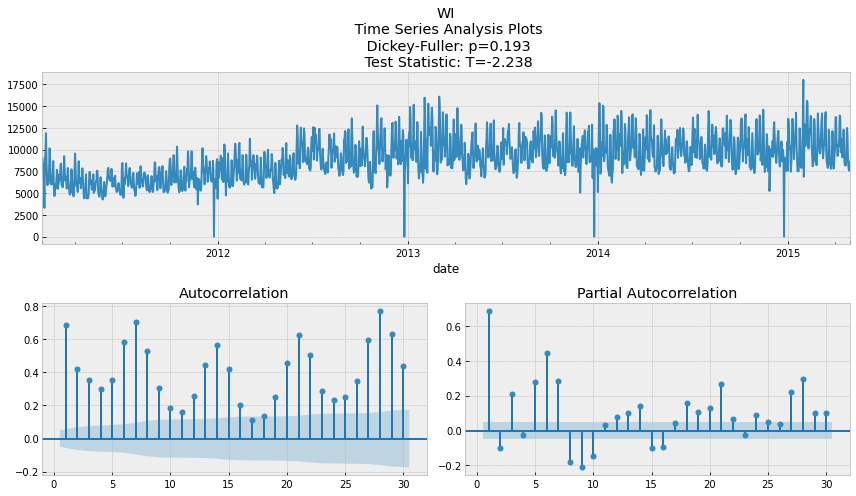

In [29]:
tsplot(train_df['WI'],'WI', lags=30)

P > 0.05 => гипотеза о нестационарности ряда не отклонена

Исходя из графика автокорреляций, более всего выделяется недельная сезонность (лаг 7)

### Приведение к стационарности

In [30]:
# Приведение к стационарности через обратный метод Бокса-Кокса
train_df['WI'] = inv_boxcox(train_df['WI'], 0.25)
valid_df['WI'] = inv_boxcox(valid_df['WI'], 0.25)

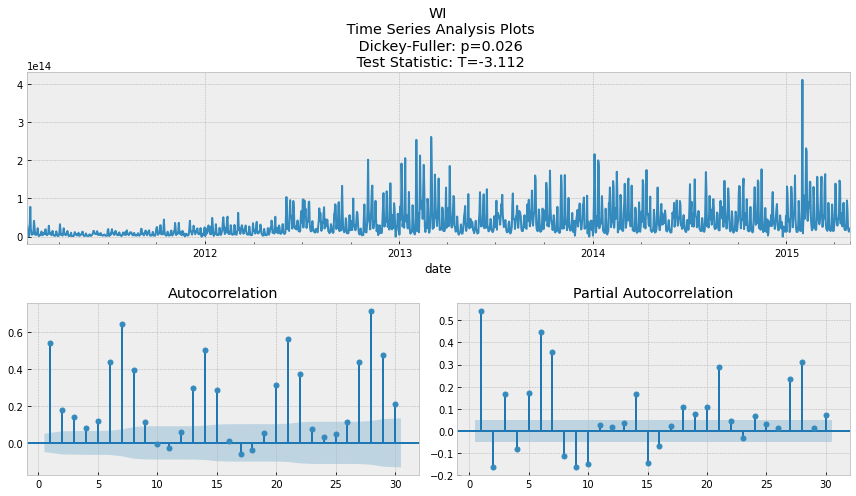

In [31]:
tsplot(train_df['WI'],'WI', lags=30)

## Modeling

### ARIMAX

#### Поиск лучших параметров

In [32]:
# Поиск лучших параметров при обучении
order_aic_bic = []
for p in range(5):
    for q in range(5):
        try:
            model = SARIMAX(train_df['WI'],order=(p,0,q))
            results = model.fit()
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            order_aic_bic.append((p, q, None, None))

c:\users\malya\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\users\malya\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\users\malya\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\users\malya\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\users\malya\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequen

c:\users\malya\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\users\malya\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\users\malya\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\users\malya\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\users\malya\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

In [33]:
# Вывод результатов обучения
order_df = pd.DataFrame(order_aic_bic, columns=['p','q','aic','bic'])

def highlight_min(s):
    '''
    highlight the minimum in a Series
    '''
    min_cols = ['aic', 'bic']
    
    if s.name in min_cols:
        is_min = s == s.min()
        return ['background-color: lightgreen' if v else '' for v in is_min]
    else:
        is_min = s == s.min()
        return ['background-color: none' if v else '' for v in is_min]
    
order_df.reset_index(drop=True).style.apply(highlight_min)

#### Обучение

In [34]:
# Обучение модели с лучшими параметрами
model = SARIMAX(train_df['WI'],order=(4,0,4))
results = model.fit()

c:\users\malya\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\users\malya\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\users\malya\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [35]:
results.summary()

c:\users\malya\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning:

invalid value encountered in sqrt



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     WI   No. Observations:                 1553
Model:               SARIMAX(4, 0, 4)   Log Likelihood              -50215.553
Date:                Sun, 20 Jun 2021   AIC                         100449.105
Time:                        16:02:43   BIC                         100497.237
Sample:                    01-29-2011   HQIC                        100467.005
                         - 04-30-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9284      0.060     31.932      0.000       1.810       2.047
ar.L2         -1.5323      0.135    -11.313      0.000      -1.798      -1.267
ar.L3          0.2892      0.135      2.149      0.032       0.025       0.553
ar.L4          0.3144      0.060      5.283      0.000       0.198       0.431
ma.L1         -1.5133      0.060    -25.350      0.000      -1.630      -1.396
ma.L2          0.7277      0.121      6.031      0.000       0.491       0.964
ma.L3          0.4388      0.116      3.784      0.000       0.212       0.666
ma.L4         -0.5814      0.050    -11.607      0.000      -0.680      -0.483
sigma2      9.129e+26        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (Q):                     1475.41   Jarque-Bera (JB):             26125.26
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              14.54   Skew:                             2.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.25e+70. Standard errors may be unstable.
"""

#### Результат

In [36]:
predictions = []
model = SARIMAX(train_df['WI'], order=(4, 0, 4))
#results = model.fit()
predictions.append(results.forecast(len(valid_df)))

predictions = np.array(predictions).reshape((-1, len(valid_df)))

c:\users\malya\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\users\malya\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [37]:
# Для удобства отображения результатов значения будут преобразованы обратно из inv_box_cox
train = boxcox(train_df['WI'], 0.25)
actual = boxcox(valid_df['WI'], 0.25)
predict = boxcox(predictions[0], 0.25)

In [38]:
Vizualization(None, train_df, valid_df).time_forecast_plot(train, actual, predict, 'ARIMAX')

In [39]:
def quality_metrics(actual, preds, model_name):
    
    """
        actual - actual values
        preds - predicted values
    """
    
    evs = explained_variance_score(actual, preds)
    maxerror = max_error(actual, preds)
    mae = mean_absolute_error(actual, preds)
    mse = mean_squared_error(actual, preds)
    msle = mean_squared_log_error(actual, preds)
    r2 = r2_score(actual, preds)
    mpd = mean_poisson_deviance(actual, preds)
    values = np.array([evs, maxerror, mae, mse, msle, r2, mpd]).reshape(1, 7)

    return pd.DataFrame(data=values,
                        columns=['evs', 'maxerror', 'mae', 'mse', 'msle', 'r2', 'mpd'],
                        index=[model_name])

In [40]:
arima_metrics = quality_metrics(actual, predict, 'ARIMAX')
arima_metrics

evs      maxerror          mae           mse      msle        r2  \
ARIMAX  0.248516  11135.805441  1961.003068  6.523688e+06  0.197321 -0.151026   

               mpd  
ARIMAX  598.850675

### Seasonal ARIMAX

#### Поиск лучших параметров

In [41]:
results = pm.auto_arima(train_df['WI'],
                        start_p=1,  # Initial guess for p
                        start_q=1,  # Intial guess for q
                        max_p=3,
                        max_q=3,
                        seasonal=True,  # Times series is seasonal
                        m=7,  # Seasonal Period
                        start_P=1,  # Initial guess for P
                        start_Q=1,  # Intial guess for Q
                        max_P=3,
                        max_Q=3,
                        information_criterion='aic',  # To select Best model
                        trace=True,  # print results while training
                        error_action='ignore',  # ignore orders that don't work
                        stepwise=True  # Apply intelligent order search
                        )

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=100468.431, Time=1.42 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=101377.185, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=100891.672, Time=0.35 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=100858.133, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=101375.185, Time=0.03 sec
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=100714.924, Time=0.90 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(1,1,1)(2,0,1)[7] intercept   : AIC=100468.280, Time=2.74 sec
 ARIMA(1,1,1)(2,0,0)[7] intercept   : AIC=inf, Time=2.18 sec
 ARIMA(1,1,1)(3,0,1)[7] intercept   : AIC=100451.550, Time=8.16 sec
 ARIMA(1,1,1)(3,0,0)[7] intercept   : AIC=inf, Time=6.32 sec
 ARIMA(1,1,1)(3,0,2)[7] intercept   : AIC=100466.567, Time=12.82 sec
 ARIMA(1,1,1)(2,0,2)[7] intercept   : AIC=inf, Time=7.71 sec
 ARIMA(0,1,1)(3,0,1)[7] intercept   : AIC=100504.382, Time=4.54 sec
 ARIMA(1,1,0)(3,0,1)[7] intercep

#### Обучение

In [42]:
# Обучение модели с лучшими параметрами
model = SARIMAX(train_df['WI'], order=(3, 1, 2), seasonal_order=(3, 0, 3, 7), trend='c')
results = model.fit()

c:\users\malya\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\users\malya\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\users\malya\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\users\malya\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\users\malya\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization fa

#### Результат

In [43]:
predictions = []
predictions.append(results.forecast(len(valid_df)))
predictions = np.array(predictions).reshape((-1, len(valid_df)))

In [44]:
# Для удобства отображения результатов значения будут преобразованы обратно из inv_box_cox
train = boxcox(train_df['WI'], 0.25)
actual = boxcox(valid_df['WI'], 0.25)
predict = boxcox(predictions[0], 0.25)

In [45]:
Vizualization(None, train_df, valid_df).time_forecast_plot(train, actual, predict, 'SARIMAX')

In [46]:
sarima_metrics = quality_metrics(actual, predict, 'SARIMAX')
sarima_metrics

evs      maxerror          mae           mse      msle  \
SARIMAX  0.066739  14570.881867  2389.930381  9.089667e+06  0.221263   

               r2        mpd  
SARIMAX -0.603762  727.14772

### Holt-Winters Exponential Smoothing

#### Обучение

In [47]:
ExpSmooth_model = ExponentialSmoothing(train_df['WI'],
                                       seasonal_periods=7,
                                       trend='add',
                                       seasonal='add').fit()

c:\users\malya\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



#### Результат

In [48]:
predictions = []
predictions = ExpSmooth_model.forecast(len(valid_df)).values

In [49]:
# Для удобства отображения результатов значения будут преобразованы обратно из inv_box_cox
train = boxcox(train_df['WI'], 0.25)
actual = boxcox(valid_df['WI'], 0.25)
predict = boxcox(predictions, 0.25)

In [50]:
Vizualization(None, train_df, valid_df).time_forecast_plot(train, actual, predict, 'ExpSmooth')

In [51]:
tripleexp_smooth_metrics = quality_metrics(actual, predict, 'ExpSmooth')
tripleexp_smooth_metrics

evs      maxerror          mae           mse      msle  \
ExpSmooth  0.447289  11744.314767  1399.378783  3.460886e+06  0.177561   

                 r2        mpd  
ExpSmooth  0.389369  323.36271

### GLUONTS

#### Подготовка датасета для обучения

In [52]:
train_df_g = sales_data_state.iloc[:, 2]

#### Обучение

In [53]:
training_data = ListDataset([{"start": train_df_g.index[0],
                              "target": train_df_g[:-len(valid_df)]}],
                              freq='1D')

In [55]:
estimator = DeepAREstimator(freq='1D',
                            prediction_length=len(valid_df),
                            trainer=Trainer(epochs=10, learning_rate=1e-4, num_batches_per_epoch=10))

predictor = estimator.train(training_data=training_data)

100%|██████████████████████████████████████████████████| 10/10 [00:13<00:00,  1.30s/it, epoch=10/10, avg_epoch_loss=32]


#### Результат

In [56]:
prediction = next(predictor.predict(training_data))

In [57]:
predictions = prediction.mean

In [58]:
# Для удобства отображения результатов значения будут преобразованы обратно из inv_box_cox
train = boxcox(train_df['WI'], 0.25)
actual = boxcox(valid_df['WI'], 0.25)
predict = boxcox(predictions, 0.25)

In [59]:
Vizualization(None, train_df, valid_df).time_forecast_plot(train, actual, predict, 'GLUON TS')

In [61]:
gluonts_metrics = quality_metrics(actual, predict, 'GLUONTS')
gluonts_metrics

evs     maxerror          mae           mse      msle        r2  \
GLUONTS  0.083102  10607.56543  1980.911301  6.982317e+06  0.195584 -0.231946   

                mpd  
GLUONTS  622.628283

### Autoregressive model

#### Обучение

In [62]:
model = AR(train_df_g[:-len(valid_df)])
fitted_model = model.fit()

c:\users\malya\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning:


statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)


c:\users\malya\appdata\l

#### Результат

In [63]:
predictions = fitted_model.predict(start=len(train_df_g[:-len(valid_df)]), end=len(train_df_g)-1, dynamic=True)

In [64]:
# Для удобства отображения результатов значения будут преобразованы обратно из inv_box_cox
train = boxcox(train_df['WI'], 0.25)
actual = boxcox(valid_df['WI'], 0.25)
predict = boxcox(predictions, 0.25)

In [65]:
Vizualization(None, train_df, valid_df).time_forecast_plot(train, actual, predict, 'AR')

In [66]:
AR_metrics = quality_metrics(actual, predict, 'AR')
AR_metrics

evs      maxerror          mae           mse      msle        r2  \
AR  0.085043  10033.101369  2095.960279  7.999776e+06  0.201186 -0.411464   

           mpd  
AR  720.996599

# Решения для задачи регрессии

## Train test split

In [67]:
# Подготовка датасета
train = sales_data_state.iloc[:, 2:5]
train.head()

WI  day  month
date                                
2011-01-29  2.565170e+13    6      1
2011-01-30  1.869975e+13    7      1
2011-01-31  8.859478e+12    1      1
2011-02-01  9.314759e+12    2      2
2011-02-02  4.705933e+11    3      2

In [68]:
train['id'] = ['WI' + str(d) for d in range(0, len(train))]
train['date'] = train.index
train.head()

WI  day  month   id       date
date                                                
2011-01-29  2.565170e+13    6      1  WI0 2011-01-29
2011-01-30  1.869975e+13    7      1  WI1 2011-01-30
2011-01-31  8.859478e+12    1      1  WI2 2011-01-31
2011-02-01  9.314759e+12    2      2  WI3 2011-02-01
2011-02-02  4.705933e+11    3      2  WI4 2011-02-02

In [69]:
# Получение тренировочной и отложенной выборки
train_df_m = train.iloc[:round(len(train)*0.8)]
valid_df_m = train.iloc[round(len(train)*0.8):]

In [70]:
train_df_m.tail()

WI  day  month      id       date
date                                                   
2015-04-26  7.065496e+13    7      4  WI1548 2015-04-26
2015-04-27  2.344690e+13    1      4  WI1549 2015-04-27
2015-04-28  1.525343e+13    2      4  WI1550 2015-04-28
2015-04-29  1.291589e+13    3      4  WI1551 2015-04-29
2015-04-30  2.141724e+13    4      4  WI1552 2015-04-30

In [71]:
valid_df_m.head()

WI  day  month      id       date
date                                                   
2015-05-01  7.009611e+13    5      5  WI1553 2015-05-01
2015-05-02  1.636644e+14    6      5  WI1554 2015-05-02
2015-05-03  1.901152e+14    7      5  WI1555 2015-05-03
2015-05-04  5.247803e+13    1      5  WI1556 2015-05-04
2015-05-05  5.158687e+13    2      5  WI1557 2015-05-05

## Генерация признаков (TSFRESH)

In [72]:
# Генерация признаков через tsfresh
df_features_train = extract_features(train_df_m, column_value='WI', column_id='id')
df_features_valid = extract_features(valid_df_m, column_value='WI', column_id='id')

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 10/10 [00:09<00:00,  1.05it/s]


In [73]:
df_features_train.columns

Index(['WI__variance_larger_than_standard_deviation', 'WI__has_duplicate_max',
       'WI__has_duplicate_min', 'WI__has_duplicate', 'WI__sum_values',
       'WI__abs_energy', 'WI__mean_abs_change', 'WI__mean_change',
       'WI__mean_second_derivative_central', 'WI__median',
       ...
       'WI__permutation_entropy__dimension_5__tau_1',
       'WI__permutation_entropy__dimension_6__tau_1',
       'WI__permutation_entropy__dimension_7__tau_1',
       'WI__query_similarity_count__query_None__threshold_0.0',
       'WI__matrix_profile__feature_"min"__threshold_0.98',
       'WI__matrix_profile__feature_"max"__threshold_0.98',
       'WI__matrix_profile__feature_"mean"__threshold_0.98',
       'WI__matrix_profile__feature_"median"__threshold_0.98',
       'WI__matrix_profile__feature_"25"__threshold_0.98',
       'WI__matrix_profile__feature_"75"__threshold_0.98'],
      dtype='object', length=792)

In [74]:
df_features_train.shape, df_features_valid.shape

((1553, 792), (388, 792))

In [75]:
# % пропущенных значений
Checker(df_features_train).check_missing(missing_edge=0.0)

missing
WI__fft_coefficient__attr_"angle"__coeff_4          100.0
WI__fft_coefficient__attr_"abs"__coeff_65           100.0
WI__fft_coefficient__attr_"angle"__coeff_2          100.0
WI__fft_coefficient__attr_"angle"__coeff_1          100.0
WI__fft_coefficient__attr_"abs"__coeff_19           100.0
...                                                   ...
WI__fft_coefficient__attr_"imag"__coeff_14          100.0
WI__fft_coefficient__attr_"imag"__coeff_15          100.0
WI__fft_coefficient__attr_"imag"__coeff_16          100.0
WI__fft_coefficient__attr_"imag"__coeff_9           100.0
WI__matrix_profile__feature_"75"__threshold_0.98    100.0

[574 rows x 1 columns]

In [76]:
# % пропущенных значений
Checker(df_features_valid).check_missing(missing_edge=0.0)

missing
WI__fft_coefficient__attr_"angle"__coeff_4          100.0
WI__fft_coefficient__attr_"abs"__coeff_65           100.0
WI__fft_coefficient__attr_"angle"__coeff_2          100.0
WI__fft_coefficient__attr_"angle"__coeff_1          100.0
WI__fft_coefficient__attr_"abs"__coeff_19           100.0
...                                                   ...
WI__fft_coefficient__attr_"imag"__coeff_14          100.0
WI__fft_coefficient__attr_"imag"__coeff_15          100.0
WI__fft_coefficient__attr_"imag"__coeff_16          100.0
WI__fft_coefficient__attr_"imag"__coeff_9           100.0
WI__matrix_profile__feature_"75"__threshold_0.98    100.0

[574 rows x 1 columns]

In [77]:
# Удаление признаков с NaN
df_features_train = df_features_train.loc[:, df_features_train.isnull().mean() < .01]
df_features_train.shape

(1553, 218)

In [78]:
# Удаление признаков с NaN
df_features_valid = df_features_valid.loc[:, df_features_valid.isnull().mean() < .01]
df_features_valid.shape

(388, 218)

In [79]:
df_features_train

WI__variance_larger_than_standard_deviation  WI__has_duplicate_max  \
WI0                                             0.0                    0.0   
WI1                                             0.0                    0.0   
WI10                                            0.0                    0.0   
WI100                                           0.0                    0.0   
WI1000                                          0.0                    0.0   
...                                             ...                    ...   
WI995                                           0.0                    0.0   
WI996                                           0.0                    0.0   
WI997                                           0.0                    0.0   
WI998                                           0.0                    0.0   
WI999                                           0.0                    0.0   

        WI__has_duplicate_min  WI__has_duplicate  WI__sum_values  \
WI0                       0.0                0.0    2.565170e+13   
WI1                       0.0                0.0    1.869975e+13   
WI10                      0.0                0.0    4.791372e+12   
WI100                     0.0                0.0    4.308782e+12   
WI1000                    0.0                0.0    3.573678e+13   
...                       ...                ...             ...   
WI995                     0.0                0.0    4.744455e+13   
WI996                     0.0                0.0    1.415738e+13   
WI997                     0.0                0.0    1.094188e+13   
WI998                     0.0                0.0    1.561944e+13   
WI999                     0.0                0.0    1.511497e+13   

        WI__abs_energy    WI__median      WI__mean  WI__length  \
WI0       6.580095e+26  2.565170e+13  2.565170e+13         1.0   
WI1       3.496805e+26  1.869975e+13  1.869975e+13         1.0   
WI10      2.295724e+25  4.791372e+12  4.791372e+12         1.0   
WI100     1.856560e+25  4.308782e+12  4.308782e+12         1.0   
WI1000    1.277118e+27  3.573678e+13  3.573678e+13         1.0   
...                ...           ...           ...         ...   
WI995     2.250985e+27  4.744455e+13  4.744455e+13         1.0   
WI996     2.004315e+26  1.415738e+13  1.415738e+13         1.0   
WI997     1.197248e+26  1.094188e+13  1.094188e+13         1.0   
WI998     2.439670e+26  1.561944e+13  1.561944e+13         1.0   
WI999     2.284624e+26  1.511497e+13  1.511497e+13         1.0   

        WI__standard_deviation  ...  WI__ratio_beyond_r_sigma__r_7  \
WI0                        0.0  ...                            0.0   
WI1                        0.0  ...                            0.0   
WI10                       0.0  ...                            0.0   
WI100                      0.0  ...                            0.0   
WI1000                     0.0  ...                            0.0   
...                        ...  ...                            ...   
WI995                      0.0  ...                            0.0   
WI996                      0.0  ...                            0.0   
WI997                      0.0  ...                            0.0   
WI998                      0.0  ...                            0.0   
WI999                      0.0  ...                            0.0   

        WI__ratio_beyond_r_sigma__r_10  \
WI0                                0.0   
WI1                                0.0   
WI10                               0.0   
WI100                              0.0   
WI1000                             0.0   
...                                ...   
WI995                              0.0   
WI996                              0.0   
WI997                              0.0   
WI998                              0.0   
WI999                              0.0   

        WI__linear_trend_timewise__attr_"rvalue"  WI__count_above__t_0  \
WI0                                      

In [80]:
df_features_valid

WI__variance_larger_than_standard_deviation  WI__has_duplicate_max  \
WI1553                                          0.0                    0.0   
WI1554                                          0.0                    0.0   
WI1555                                          0.0                    0.0   
WI1556                                          0.0                    0.0   
WI1557                                          0.0                    0.0   
...                                             ...                    ...   
WI1936                                          0.0                    0.0   
WI1937                                          0.0                    0.0   
WI1938                                          0.0                    0.0   
WI1939                                          0.0                    0.0   
WI1940                                          0.0                    0.0   

        WI__has_duplicate_min  WI__has_duplicate  WI__sum_values  \
WI1553                    0.0                0.0    7.009611e+13   
WI1554                    0.0                0.0    1.636644e+14   
WI1555                    0.0                0.0    1.901152e+14   
WI1556                    0.0                0.0    5.247803e+13   
WI1557                    0.0                0.0    5.158687e+13   
...                       ...                ...             ...   
WI1936                    0.0                0.0    5.817514e+13   
WI1937                    0.0                0.0    6.851086e+13   
WI1938                    0.0                0.0    1.056133e+14   
WI1939                    0.0                0.0    1.842953e+14   
WI1940                    0.0                0.0    1.916558e+14   

        WI__abs_energy    WI__median      WI__mean  WI__length  \
WI1553    4.913465e+27  7.009611e+13  7.009611e+13         1.0   
WI1554    2.678605e+28  1.636644e+14  1.636644e+14         1.0   
WI1555    3.614378e+28  1.901152e+14  1.901152e+14         1.0   
WI1556    2.753944e+27  5.247803e+13  5.247803e+13         1.0   
WI1557    2.661205e+27  5.158687e+13  5.158687e+13         1.0   
...                ...           ...           ...         ...   
WI1936    3.384347e+27  5.817514e+13  5.817514e+13         1.0   
WI1937    4.693739e+27  6.851086e+13  6.851086e+13         1.0   
WI1938    1.115417e+28  1.056133e+14  1.056133e+14         1.0   
WI1939    3.396476e+28  1.842953e+14  1.842953e+14         1.0   
WI1940    3.673194e+28  1.916558e+14  1.916558e+14         1.0   

        WI__standard_deviation  ...  WI__ratio_beyond_r_sigma__r_7  \
WI1553                     0.0  ...                            0.0   
WI1554                     0.0  ...                            0.0   
WI1555                     0.0  ...                            0.0   
WI1556                     0.0  ...                            0.0   
WI1557                     0.0  ...                            0.0   
...                        ...  ...                            ...   
WI1936                     0.0  ...                            0.0   
WI1937                     0.0  ...                            0.0   
WI1938                     0.0  ...                            0.0   
WI1939                     0.0  ...                            0.0   
WI1940                     0.0  ...                            0.0   

        WI__ratio_beyond_r_sigma__r_10  \
WI1553                             0.0   
WI1554                             0.0   
WI1555                             0.0   
WI1556                             0.0   
WI1557                             0.0   
...                                ...   
WI1936                             0.0   
WI1937                             0.0   
WI1938                             0.0   
WI1939                             0.0   
WI1940                             0.0   

        WI__linear_trend_timewise__attr_"rvalue"  WI__count_above__t_0  \
WI1553                                   

## Формирование итоговых X_train, X_valid, y_train, y_valid

In [81]:
# Установим правильный порядок строк в df_features_train
reindex_list = list(train['id'].values)[:len(train_df_m)]

In [82]:
df_features_train.reindex(reindex_list)

WI__variance_larger_than_standard_deviation  WI__has_duplicate_max  \
WI0                                             0.0                    0.0   
WI1                                             0.0                    0.0   
WI2                                             0.0                    0.0   
WI3                                             0.0                    0.0   
WI4                                             0.0                    0.0   
...                                             ...                    ...   
WI1548                                          0.0                    0.0   
WI1549                                          0.0                    0.0   
WI1550                                          0.0                    0.0   
WI1551                                          0.0                    0.0   
WI1552                                          0.0                    0.0   

        WI__has_duplicate_min  WI__has_duplicate  WI__sum_values  \
WI0                       0.0                0.0    2.565170e+13   
WI1                       0.0                0.0    1.869975e+13   
WI2                       0.0                0.0    8.859478e+12   
WI3                       0.0                0.0    9.314759e+12   
WI4                       0.0                0.0    4.705933e+11   
...                       ...                ...             ...   
WI1548                    0.0                0.0    7.065496e+13   
WI1549                    0.0                0.0    2.344690e+13   
WI1550                    0.0                0.0    1.525343e+13   
WI1551                    0.0                0.0    1.291589e+13   
WI1552                    0.0                0.0    2.141724e+13   

        WI__abs_energy    WI__median      WI__mean  WI__length  \
WI0       6.580095e+26  2.565170e+13  2.565170e+13         1.0   
WI1       3.496805e+26  1.869975e+13  1.869975e+13         1.0   
WI2       7.849035e+25  8.859478e+12  8.859478e+12         1.0   
WI3       8.676473e+25  9.314759e+12  9.314759e+12         1.0   
WI4       2.214581e+23  4.705933e+11  4.705933e+11         1.0   
...                ...           ...           ...         ...   
WI1548    4.992124e+27  7.065496e+13  7.065496e+13         1.0   
WI1549    5.497573e+26  2.344690e+13  2.344690e+13         1.0   
WI1550    2.326671e+26  1.525343e+13  1.525343e+13         1.0   
WI1551    1.668202e+26  1.291589e+13  1.291589e+13         1.0   
WI1552    4.586982e+26  2.141724e+13  2.141724e+13         1.0   

        WI__standard_deviation  ...  WI__ratio_beyond_r_sigma__r_7  \
WI0                        0.0  ...                            0.0   
WI1                        0.0  ...                            0.0   
WI2                        0.0  ...                            0.0   
WI3                        0.0  ...                            0.0   
WI4                        0.0  ...                            0.0   
...                        ...  ...                            ...   
WI1548                     0.0  ...                            0.0   
WI1549                     0.0  ...                            0.0   
WI1550                     0.0  ...                            0.0   
WI1551                     0.0  ...                            0.0   
WI1552                     0.0  ...                            0.0   

        WI__ratio_beyond_r_sigma__r_10  \
WI0                                0.0   
WI1                                0.0   
WI2                                0.0   
WI3                                0.0   
WI4                                0.0   
...                                ...   
WI1548                             0.0   
WI1549                             0.0   
WI1550                             0.0   
WI1551                             0.0   
WI1552                             0.0   

        WI__linear_trend_timewise__attr_"rvalue"  WI__count_above__t_0  \
WI0                                      

In [83]:
# Сделаем одинаковые индексы перед объединением
df_features_train.index = train_df_m.index
df_features_valid.index = valid_df_m.index

In [84]:
train_df_m = pd.get_dummies(train_df_m, columns = ['day', 'month'])
train_df_m = train_df_m.drop(['date', 'id'], axis=1)
train_df_m.head()

WI  day_1  day_2  day_3  day_4  day_5  day_6  day_7  \
date                                                                        
2011-01-29  2.565170e+13      0      0      0      0      0      1      0   
2011-01-30  1.869975e+13      0      0      0      0      0      0      1   
2011-01-31  8.859478e+12      1      0      0      0      0      0      0   
2011-02-01  9.314759e+12      0      1      0      0      0      0      0   
2011-02-02  4.705933e+11      0      0      1      0      0      0      0   

            month_1  month_2  month_3  month_4  month_5  month_6  month_7  \
date                                                                        
2011-01-29        1        0        0        0        0        0        0   
2011-01-30        1        0        0        0        0        0        0   
2011-01-31        1        0        0        0        0        0        0   
2011-02-01        0        1        0        0        0        0        0   
2011-02-02        0        1        0        0        0        0        0   

            month_8  month_9  month_10  month_11  month_12  
date                                                        
2011-01-29        0        0         0         0         0  
2011-01-30        0        0         0         0         0  
2011-01-31        0        0         0         0         0  
2011-02-01        0        0         0         0         0  
2011-02-02        0        0         0         0         0

In [85]:
valid_df_m = pd.get_dummies(valid_df_m, columns = ['day', 'month'])
valid_df_m = valid_df_m.drop(['date', 'id'], axis=1)
valid_df_m.head()

WI  day_1  day_2  day_3  day_4  day_5  day_6  day_7  \
date                                                                        
2015-05-01  7.009611e+13      0      0      0      0      1      0      0   
2015-05-02  1.636644e+14      0      0      0      0      0      1      0   
2015-05-03  1.901152e+14      0      0      0      0      0      0      1   
2015-05-04  5.247803e+13      1      0      0      0      0      0      0   
2015-05-05  5.158687e+13      0      1      0      0      0      0      0   

            month_1  month_2  month_3  month_4  month_5  month_6  month_7  \
date                                                                        
2015-05-01        0        0        0        0        1        0        0   
2015-05-02        0        0        0        0        1        0        0   
2015-05-03        0        0        0        0        1        0        0   
2015-05-04        0        0        0        0        1        0        0   
2015-05-05        0        0        0        0        1        0        0   

            month_8  month_9  month_10  month_11  month_12  
date                                                        
2015-05-01        0        0         0         0         0  
2015-05-02        0        0         0         0         0  
2015-05-03        0        0         0         0         0  
2015-05-04        0        0         0         0         0  
2015-05-05        0        0         0         0         0

In [86]:
# Формирование y_train, y_valid
y_train = train_df_m['WI']
y_valid = valid_df_m['WI']

In [87]:
# Формирование X_train, X_valid
X_train = train_df_m.join(df_features_train).drop(['WI'], axis=1)
X_valid = valid_df_m.join(df_features_valid).drop(['WI'], axis=1)

In [88]:
y_train.shape, y_valid.shape, X_train.shape, X_valid.shape

((1553,), (388,), (1553, 237), (388, 237))

## Modeling

### CatBoost

#### Модель

In [114]:
# Параметры сети
catbst_param_grid = {'learning_rate': [0.03, 0.1],
                     'depth': [2, 3, 4, 6],
                     'l2_leaf_reg': [0.2, 0.5, 1, 3]}

In [115]:
# Поиск лучших параметров
best_score = np.inf
for g in ParameterGrid(catbst_param_grid):
    catbst = CatBoostRegressor(n_estimators=100,
                               random_state=16,
                               verbose=10)
    catbst.set_params(**g)
    catbst.fit(X_train, y_train)
    print(catbst.best_score_)
    if catbst.get_best_score()['learn']['RMSE'] < best_score:
        best_score = catbst.get_best_score()['learn']['RMSE']
        best_parametrs = g

0:	learn: 38407860343430.7343750	total: 13.5ms	remaining: 1.34s
10:	learn: 36407526716434.9921875	total: 21.9ms	remaining: 177ms
20:	learn: 35138550552298.1601563	total: 30.4ms	remaining: 114ms
30:	learn: 34454615686104.8281250	total: 38.1ms	remaining: 84.9ms
40:	learn: 33922638768140.2421875	total: 46.4ms	remaining: 66.8ms
50:	learn: 33661960646573.8789063	total: 54.8ms	remaining: 52.6ms
60:	learn: 33396352353875.7109375	total: 62.1ms	remaining: 39.7ms
70:	learn: 33178227691023.4804688	total: 70.4ms	remaining: 28.8ms
80:	learn: 33008675622176.8593750	total: 77.9ms	remaining: 18.3ms
90:	learn: 32871285975973.7460938	total: 86ms	remaining: 8.51ms
99:	learn: 32753411873613.5312500	total: 92.1ms	remaining: 0us
{'learn': {'RMSE': 32753411873613.53}}
0:	learn: 37895378922778.8984375	total: 1.02ms	remaining: 102ms
10:	learn: 34000046792040.7968750	total: 9.21ms	remaining: 74.5ms
20:	learn: 33155208223103.9179688	total: 17.4ms	remaining: 65.4ms
30:	learn: 32672714266174.5937500	total: 26.5ms	

10:	learn: 33702244686578.1171875	total: 17.8ms	remaining: 144ms
20:	learn: 32704948251654.8945313	total: 30ms	remaining: 113ms
30:	learn: 32069188012098.6875000	total: 40.3ms	remaining: 89.7ms
40:	learn: 31726125438563.9453125	total: 53.1ms	remaining: 76.5ms
50:	learn: 31358653503082.2656250	total: 64ms	remaining: 61.5ms
60:	learn: 31126601082852.2304688	total: 74.6ms	remaining: 47.7ms
70:	learn: 30821018947759.0039063	total: 85.3ms	remaining: 34.8ms
80:	learn: 30591326007282.7343750	total: 95.4ms	remaining: 22.4ms
90:	learn: 30389888241501.8867188	total: 110ms	remaining: 10.9ms
99:	learn: 30156073108918.1757813	total: 121ms	remaining: 0us
{'learn': {'RMSE': 30156073108918.176}}
0:	learn: 38334940918682.1015625	total: 15.4ms	remaining: 1.53s
10:	learn: 36177985300172.3203125	total: 32.9ms	remaining: 266ms
20:	learn: 34867906275931.9453125	total: 48.6ms	remaining: 183ms
30:	learn: 33959735017537.2578125	total: 60.4ms	remaining: 134ms
40:	learn: 33474181998537.3710938	total: 71.5ms	rema

{'learn': {'RMSE': 31735210646030.01}}
0:	learn: 37670177518469.7421875	total: 13.5ms	remaining: 1.33s
10:	learn: 33310909597964.3476563	total: 34.9ms	remaining: 282ms
20:	learn: 32233813606613.1015625	total: 57.2ms	remaining: 215ms
30:	learn: 31608551606936.7109375	total: 79.5ms	remaining: 177ms
40:	learn: 31288328922112.9375000	total: 99.3ms	remaining: 143ms
50:	learn: 30986776080733.9843750	total: 120ms	remaining: 115ms
60:	learn: 30705826794743.4531250	total: 148ms	remaining: 94.4ms
70:	learn: 30499019048172.1523438	total: 183ms	remaining: 74.9ms
80:	learn: 30255894281036.9101563	total: 262ms	remaining: 61.6ms
90:	learn: 29996502930886.4023438	total: 279ms	remaining: 27.6ms
99:	learn: 29726588388392.2343750	total: 294ms	remaining: 0us
{'learn': {'RMSE': 29726588388392.234}}
0:	learn: 38324668410153.5781250	total: 11.4ms	remaining: 1.13s
10:	learn: 35885799194252.6171875	total: 56.9ms	remaining: 460ms
20:	learn: 34173205680283.0859375	total: 108ms	remaining: 408ms
30:	learn: 3313624

In [116]:
# Экземпляр CatBoost с лучшими параметрами
catbst_best = CatBoostRegressor(n_estimators=100,
                                random_state=16,
                                **best_parametrs)

In [117]:
# Обучение модели с лучшими параметрами
catbst_best.fit(X_train, y_train)

0:	learn: 37623511068845.8671875	total: 4.95ms	remaining: 490ms
1:	learn: 36768125786573.9062500	total: 8.92ms	remaining: 437ms
2:	learn: 36012473450086.3125000	total: 13.7ms	remaining: 444ms
3:	learn: 35383413929828.0390625	total: 18.2ms	remaining: 437ms
4:	learn: 34872458545953.2421875	total: 22.2ms	remaining: 423ms
5:	learn: 34334854389540.0000000	total: 26.3ms	remaining: 412ms
6:	learn: 33984359812605.5156250	total: 31.4ms	remaining: 417ms
7:	learn: 33684419312586.7304688	total: 35.4ms	remaining: 407ms
8:	learn: 33315929192547.1953125	total: 39.4ms	remaining: 398ms
9:	learn: 32922323937937.9726563	total: 44.8ms	remaining: 404ms
10:	learn: 32678404391269.5390625	total: 49.7ms	remaining: 402ms
11:	learn: 32398905138009.7539063	total: 53.6ms	remaining: 393ms
12:	learn: 32202108263501.1679688	total: 58.6ms	remaining: 392ms
13:	learn: 31976604151672.8671875	total: 62.9ms	remaining: 387ms
14:	learn: 31805934890153.4375000	total: 66.8ms	remaining: 379ms
15:	learn: 31772171831719.3398438	t

#### Результат

In [118]:
y_pred = catbst_best.predict(X_valid)

In [119]:
# Для удобства отображения результатов значения будут преобразованы обратно из inv_box_cox
predict = boxcox(y_pred, 0.25)
train = boxcox(y_train, 0.25)
actual = boxcox(y_valid, 0.25)

In [120]:
Vizualization(None, train_df, valid_df).time_forecast_plot(train, actual, predict, 'Catboost')

In [121]:
catboost_metrics = quality_metrics(actual, predict, 'Catboost')
catboost_metrics

evs    maxerror          mae           mse      msle        r2  \
Catboost  0.289543  9621.75842  2504.331101  9.569072e+06  0.221303 -0.688347   

                 mpd  
Catboost  924.911238

In [133]:
# Отображение наиболее значимых признаков
def plot_feature_importance(importance, names, model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df = fi_df.iloc[:15, :]
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

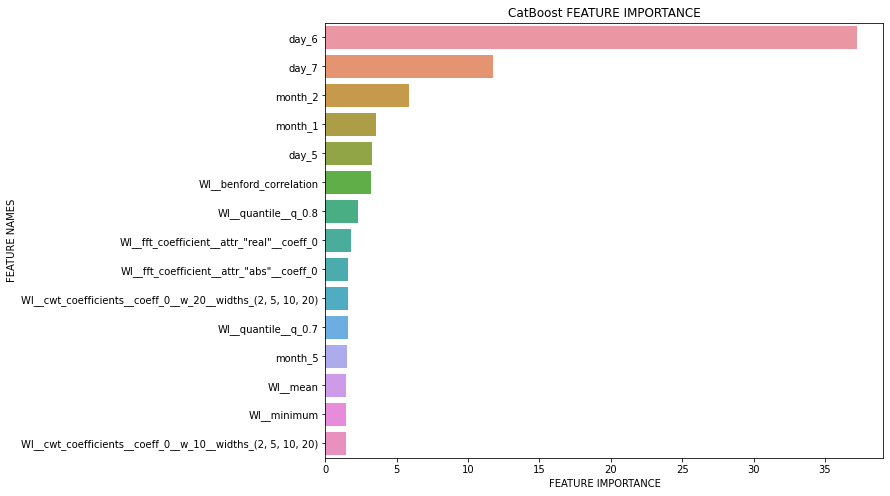

In [134]:
plot_feature_importance(catbst_best.feature_importances_,X_train.columns,'CatBoost')

### Stacking Regressor

#### Подготовка датасета

In [140]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_valid_s = scaler.transform(X_valid)

#### Модель

In [174]:
# Базовые модели
estimators = [('lr', Ridge()),
              ('svr', LinearSVR(random_state=42))]

In [175]:
# Параметры сети
stack_param_grid = {'svr__C':[0.1, 0.5, 1, 1.5],
                   'lr__alpha':[0.1, 0.5, 1, 2], 
                   'final_estimator__max_depth':[2, 3, 4]}

In [176]:
# Поиск лучших параметров
best_score = -np.inf
for g in ParameterGrid(stack_param_grid):
    model = StackingRegressor(estimators=estimators,
                          final_estimator=RandomForestRegressor(n_estimators=20, random_state=42))
    model.set_params(**g)
    model.fit(X_train_s, y_train)
    if model.score(X_train_s, y_train) > best_score:
        best_score = model.score(X_train_s, y_train)
        best_parametrs = g

In [164]:
# Обучение модели с лучшими параметрами
best_model = StackingRegressor(estimators=estimators,
                          final_estimator=RandomForestRegressor(n_estimators=20, random_state=42))

In [165]:
best_model.set_params(**best_parametrs)

StackingRegressor(estimators=[('lr', Ridge(alpha=0.1)),
                              ('svr', LinearSVR(C=0.1, random_state=42))],
                  final_estimator=RandomForestRegressor(max_depth=2,
                                                        n_estimators=20,
                                                        random_state=42))

In [166]:
best_model.fit(X_train_s, y_train)

StackingRegressor(estimators=[('lr', Ridge(alpha=0.1)),
                              ('svr', LinearSVR(C=0.1, random_state=42))],
                  final_estimator=RandomForestRegressor(max_depth=2,
                                                        n_estimators=20,
                                                        random_state=42))

#### Результаты

In [167]:
y_pred = best_model.predict(X_valid_s)

In [168]:
# Для удобства отображения результатов значения будут преобразованы обратно из inv_box_cox
predict = boxcox(y_pred, 0.25)
train = boxcox(y_train, 0.25)
actual = boxcox(y_valid, 0.25)

In [169]:
Vizualization(None, train_df, valid_df).time_forecast_plot(train, actual, predict, 'Stacking')

In [170]:
stacking_metrics = quality_metrics(actual, predict, 'Stacking')
stacking_metrics

evs      maxerror          mae           mse      msle  \
Stacking  0.146555  10456.369266  2431.855786  9.849296e+06  0.215478   

                r2         mpd  
Stacking -0.737789  928.454346

# Overview

In [171]:
metrics_df = pd.concat([arima_metrics,
                        sarima_metrics,
                        tripleexp_smooth_metrics,
                        gluonts_metrics,
                        AR_metrics,
                        catboost_metrics,
                        stacking_metrics])
metrics_df

evs      maxerror          mae           mse      msle  \
ARIMAX     0.248516  11135.805441  1961.003068  6.523688e+06  0.197321   
SARIMAX    0.066739  14570.881867  2389.930381  9.089667e+06  0.221263   
ExpSmooth  0.447289  11744.314767  1399.378783  3.460886e+06  0.177561   
GLUONTS    0.083102  10607.565430  1980.911301  6.982317e+06  0.195584   
AR         0.085043  10033.101369  2095.960279  7.999776e+06  0.201186   
Catboost   0.289543   9621.758420  2504.331101  9.569072e+06  0.221303   
Stacking   0.146555  10456.369266  2431.855786  9.849296e+06  0.215478   

                 r2         mpd  
ARIMAX    -0.151026  598.850675  
SARIMAX   -0.603762  727.147720  
ExpSmooth  0.389369  323.362710  
GLUONTS   -0.231946  622.628283  
AR        -0.411464  720.996599  
Catboost  -0.688347  924.911238  
Stacking  -0.737789  928.454346

In [172]:
def highlight_min_max(s):
    
    col_min = ['maxerror', 'mae', 'mse', 'msle', 'mpd']
    col_max = ['evs', 'r2']
    
    if s.name in col_min:
        is_min = s == s.min()
        return ['background-color: lightgreen' if v else '' for v in is_min]
    else:
        is_max = s == s.max()
        return ['background-color: lightgreen' if v else '' for v in is_max]

In [173]:
metrics_df.reset_index(drop=True).style.apply(highlight_min_max)